<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [1]:
import pandas as pd

In [2]:
#DATA PREPARATION

In [3]:
df = pd.read_csv("Dataset_Perkapalan.csv")

In [4]:
df.shape

(10787, 8)

In [5]:
df.head(10)

,Flight,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1
5,3641.0,1045.0,160.0,MQ,MIA,CMH,1,0
6,138.0,1160.0,185.0,WN,BDL,MCO,7,0
7,586.0,700.0,142.0,AS,PDX,SNA,2,1
8,5220.0,895.0,102.0,EV,AEX,ATL,2,0
9,5122.0,516.0,137.0,EV,DTW,MCI,7,0


In [6]:
df.tail(10)

,Flight,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
10777,1679.0,505.0,57.0,CO,IAH,SAT,1,1
10778,508.0,480.0,325.0,WN,MCO,LAS,3,1
10779,4961.0,NaN,80.0,EV,FLO,ATL,6,0
10780,2297.0,560.0,65.0,XE,MKE,CLE,6,1
10781,1227.0,645.0,75.0,WN,RDU,PHL,2,0
10782,2821.0,610.0,50.0,MQ,DFW,SPS,2,0
10783,2618.0,839.0,118.0,XE,SDF,EWR,2,0
10784,1973.0,1160.0,124.0,DL,ATL,MIA,2,0
10785,528.0,1275.0,112.0,US,PHX,RNO,4,0
10786,2254.0,970.0,NaN,DL,ATL,CMH,4,1


In [7]:
## MEMBERSIHKAN DATA TERLEBIH DAHULU

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

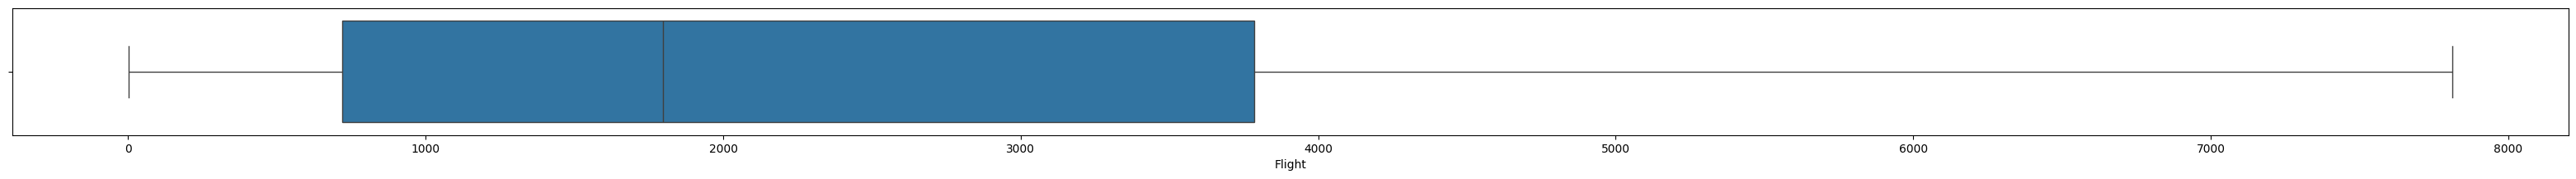

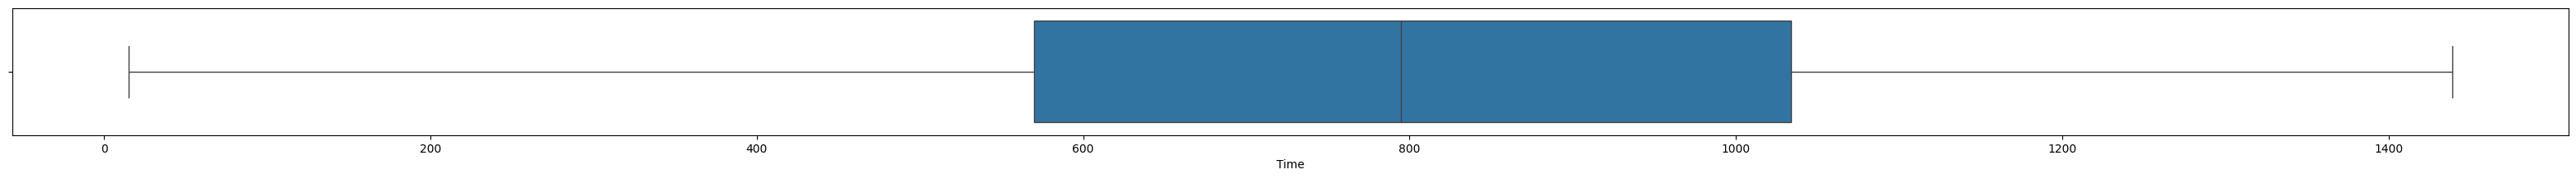

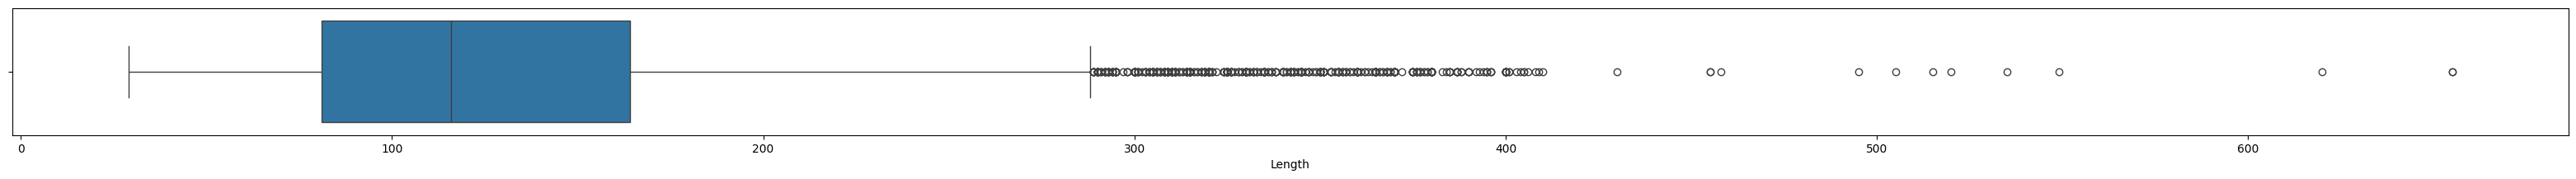

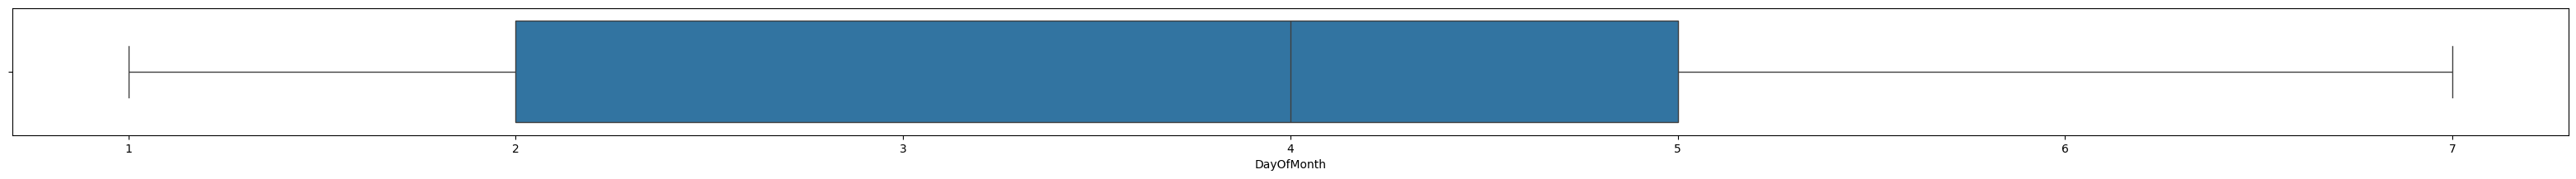

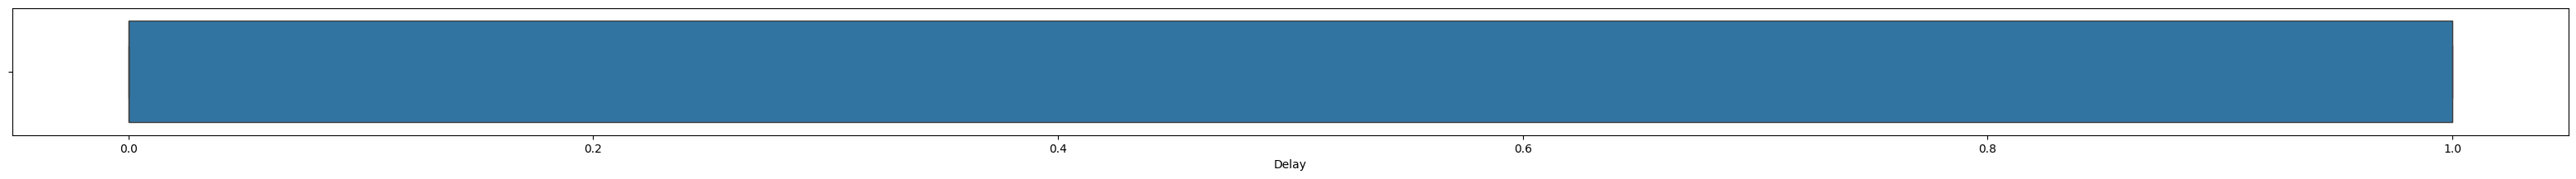

In [9]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
 plt.figure(figsize=(40,2))
 sns.boxplot(data=df_outlier, x=column)

In [10]:
#### Data Preparation > Membersihkan outliers

In [11]:
df.dtypes

Flight        float64
Time          float64
Length        float64
Ships          object
PortFrom       object
PortTo         object
DayOfMonth      int64
Delay           int64
dtype: object

In [12]:
df.select_dtypes(exclude="object").head()

,Flight,Time,Length,DayOfMonth,Delay
0,320.0,870.0,180.0,5,0
1,3045.0,365.0,66.0,2,0
2,1560.0,740.0,257.0,7,0
3,1156.0,595.0,235.0,7,1
4,1873.0,530.0,133.0,6,1


In [13]:
#menggunakan batas atas dan batas bawah

In [14]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Flight        3065.5
Time           464.0
Length          83.0
DayOfMonth       3.0
Delay            1.0
dtype: float64

In [15]:
#membersihkan outliers dengan memperkitakan batas atas dan batas bawah,
#dengan menghapus data dipuar batas iqr

In [16]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Flight        8383.75
Time          1730.00
Length         288.50
DayOfMonth       9.50
Delay            2.50
dtype: float64

In [17]:
df_noid_outlier_clean = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

In [18]:
df_noid_outlier_clean.head()

,Flight,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


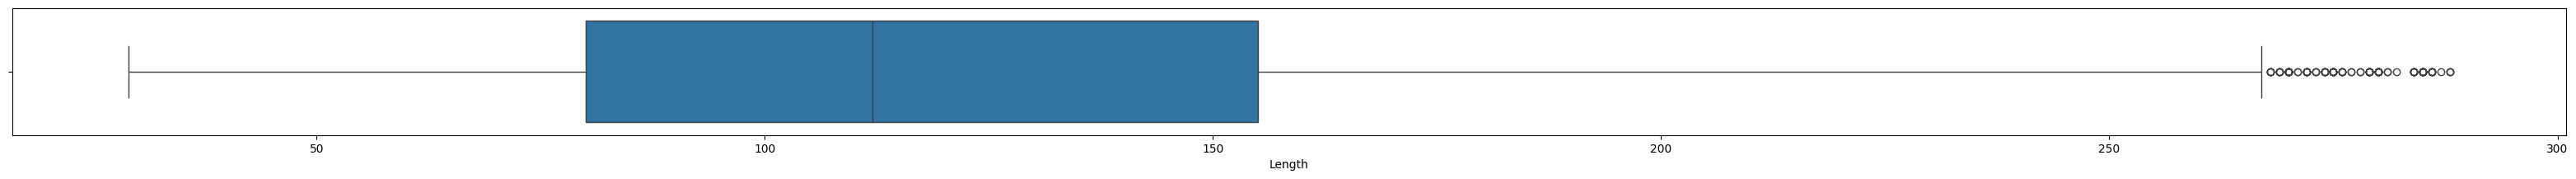

In [20]:
plt.figure(figsize=(40, 2))
sns.boxplot(data=df_noid_outlier_clean, x='Length')  # Pastikan 'Duration' sesuai dengan nama kolom
plt.show()

In [21]:
df_noid_outlier_clean['Length'].max()

288.0

In [22]:
# Misalkan 'track_length' adalah kolom numerik yang ingin Anda hitung IQR-nya
q1 = df_noid_outlier_clean['Length'].quantile(0.25)
q3 = df_noid_outlier_clean['Length'].quantile(0.75)
iqr = q3 - q1
iqr

75.0

In [23]:
batas_atas = q3 + 1.5 * iqr
batas_atas

267.5

In [25]:
jml_outliers = (df_noid_outlier_clean['Length'] > batas_atas).sum()
print(jml_outliers)

127


In [26]:
persentase_outliers = jml_outliers / df_noid_outlier_clean.shape[0] * 100
print(persentase_outliers)

1.2324114507520623


In [27]:
#teknik windorizing

In [28]:
df = pd.read_csv("Dataset_Perkapalan.csv")

In [29]:
from scipy.stats.mstats import winsorize

In [30]:
df['Length'] = winsorize(df['Length'], limits=[0, 0.05])

<Axes: xlabel='Length'>

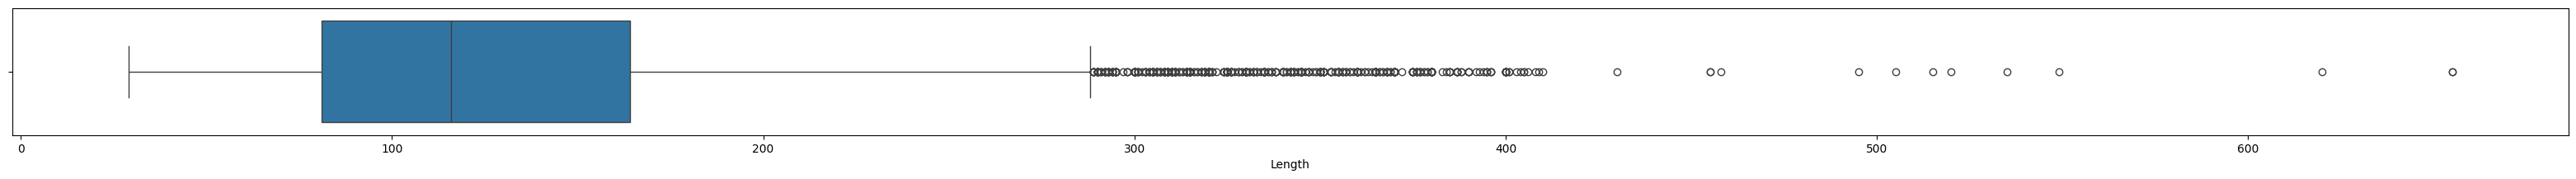

In [32]:
# Mencari Outliers - Boxplot
plt.figure(figsize=(40,2))
sns.boxplot(data=df, x=df['Length'])

In [33]:
#selanjutnya Gunakan algoritma linear regression, logistic regression, dan K-NN
#Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [34]:
#1. Linear Regresiion

In [91]:
import pandas as pd

In [92]:
df = pd.read_csv("Dataset_Perkapalan.csv")

In [93]:
df = df.iloc[:,1:]

In [94]:
#lihat data 
df.head(3)

,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,870.0,180.0,NaN,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0


In [95]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [96]:
print(df.columns)

Index(['Time', 'Length', 'Ships', 'PortFrom', 'PortTo', 'DayOfMonth', 'Delay'], dtype='object')


In [97]:
scaler = RobustScaler()
df[['Length', 'Time']] = scaler.fit_transform(df[['Length', 'Time']]) 
df.head()

,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,0.161638,0.771084,NaN,IAH,PHX,5,0
1,-0.926724,-0.602410,OO,DSM,MKE,2,0
2,-0.118534,1.698795,DL,SEA,CVG,7,0
3,-0.431034,1.433735,WN,SNA,MDW,7,1
4,-0.571121,0.204819,CO,IAH,MCO,6,1


In [98]:
#masih ada NaN brarti kita harus mencari rata rata dan memasukanya ke data yang NaN

In [99]:
df.isna().sum()

Time           873
Length        1343
Ships          582
PortFrom         0
PortTo           0
DayOfMonth       0
Delay            0
dtype: int64

In [100]:

missing_data_count = df['Time'].isnull().sum()

total_data_length = len(df['Time'])
missing_data_percentage = (missing_data_count / total_data_length) * 100
print(f"Persentase data yang kosong pada kolom 'Time': {missing_data_percentage:.2f}%")

Persentase data yang kosong pada kolom 'Time': 8.09%


In [101]:
# 9. Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata
mean_imputation_value = df['Time'].mean() # Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Time"
df['Time'] = df['Time'].fillna(mean_imputation_value)
meanImputation = mean_imputation_value

In [102]:
# 10. Mengisi nilai kosong menggunakan fungsi fillna dengan nilai rata-rata pada kolom Time
df['Time'].fillna(df['Time'].mean(), inplace=True)

/tmp/ipykernel_149959/1506115602.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time'].fillna(df['Time'].mean(), inplace=True)


In [103]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df[['Time']]
y = df['Delay']

In [104]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [106]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression

In [107]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [108]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.35403114 0.44670824 0.53691394 ... 0.45125022 0.39555048 0.48995755]


In [109]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.354031
6132,0,0.446708
9949,0,0.536914
10440,0,0.519367
9097,1,0.447944


In [112]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.7 else 0 for prob in y_pred_lr]

In [113]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Presentasi dari  Linear Regresiion, Accuracy:"
      , (round(accuracy_score(y_test, y_predict_class), 3))*100, "%") # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

Presentasi dari  Linear Regresiion, Accuracy: 56.3 %


In [56]:
# 2.  logistic regression

In [57]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [58]:
scaler = RobustScaler()
df[['Time','Length']] = scaler.fit_transform(df[['Time','Length']])
df.head()

,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,0.157127,0.771084,NaN,IAH,PHX,5,0
1,-1.033911,-0.602410,OO,DSM,MKE,2,0
2,-0.149477,1.698795,DL,SEA,CVG,7,0
3,-0.491458,1.433735,WN,SNA,MDW,7,1
4,-0.644760,0.204819,CO,IAH,MCO,6,1


In [59]:
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test are your feature matrices
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies too
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [60]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [61]:
df_cleaned = df.dropna(subset=[ 'Time', 'Length', 'DayOfMonth'])
X_train = df_cleaned[[ 'Time', 'Length', 'DayOfMonth']]
y_train = df_cleaned['Delay']
df_cleaned

,Time,Length,Ships,PortFrom,PortTo,DayOfMonth,Delay
0,0.157127,0.771084,NaN,IAH,PHX,5,0
1,-1.033911,-0.602410,OO,DSM,MKE,2,0
2,-0.149477,1.698795,DL,SEA,CVG,7,0
3,-0.491458,1.433735,WN,SNA,MDW,7,1
4,-0.644760,0.204819,CO,IAH,MCO,6,1
...,...,...,...,...,...,...,...
10781,-0.373534,-0.493976,WN,RDU,PHL,2,0
10782,-0.456081,-0.795181,MQ,DFW,SPS,2,0
10783,0.084014,0.024096,XE,SDF,EWR,2,0
10784,0.841089,0.096386,DL,ATL,MIA,2,0


In [62]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming df is your DataFrame
clf = HistGradientBoostingClassifier()
X = df_cleaned[[ 'Time', 'Length', 'DayOfMonth']]
y = df_cleaned['Delay']
clf.fit(X, y)

HistGradientBoostingClassifier()

In [63]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Ships', 'PortFrom', 'PortTo',	'DayOfMonth', 'Delay']

In [64]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cleaned[cat_col] = df_cleaned[cat_col].apply(le.fit_transform)

/tmp/ipykernel_149959/3204283388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[cat_col] = df_cleaned[cat_col].apply(le.fit_transform)


In [65]:
# Membuat variabel independen (X) dan variabel dependen (y)
X =df_cleaned.iloc[:,0:-1].values
y =df_cleaned.iloc[:,-1].values

In [66]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [67]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

In [68]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [69]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [70]:
# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1261,  289],
       [ 937,  347]])

Text(0.5, 427.9555555555555, 'Predicted label')

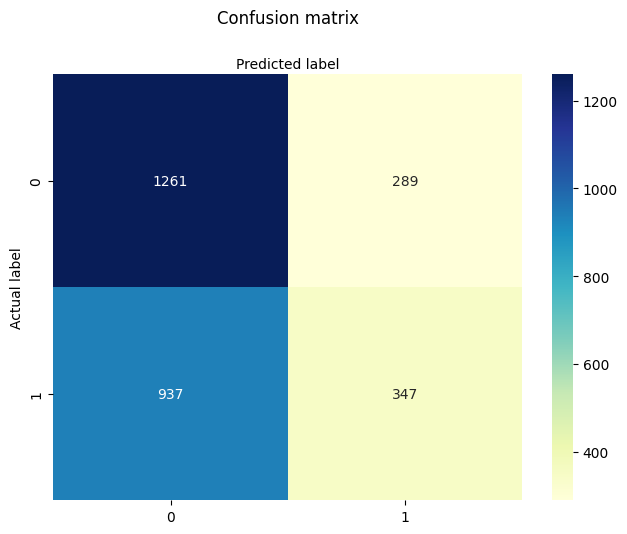

In [71]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [72]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.57      0.81      0.67      1550
     Delayed       0.55      0.27      0.36      1284

    accuracy                           0.57      2834
   macro avg       0.56      0.54      0.52      2834
weighted avg       0.56      0.57      0.53      2834



In [73]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.57      0.81      0.67      1550
     Delayed       0.55      0.27      0.36      1284

    accuracy                           0.57      2834
   macro avg       0.56      0.54      0.52      2834
weighted avg       0.56      0.57      0.53      2834



In [74]:
import matplotlib.pyplot as plt

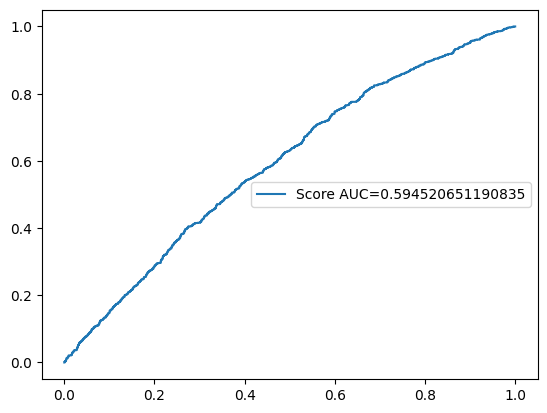

(59.4520651190835, '%')

In [83]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=7)

# Menampilkan grafik
plt.show()

score = ((auc*100),'%')
score

In [73]:
# 3.Algoritma KNN

In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cleaned[cat_col] = df_cleaned[cat_col].apply(le.fit_transform)

/tmp/ipykernel_149959/4179355399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[cat_col] = df_cleaned[cat_col].apply(le.fit_transform)


In [77]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_cleaned.iloc[:,0:-1].values
y = df_cleaned.iloc[:,-1].values

In [78]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [79]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [82]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set KNN adalah:", round(score, 5)*100, "%")

Accuracy on the training set KNN adalah: 55.295 %


In [81]:
# ====================================================
# Bisa Disimpulkan dari algoritma linear regression, logistic regression, dan K-NN, 
#yang memiliki akurasi paling tinggi adalah Logistic Regression dengan akurasi 59.45307004321173 %
# Algoritma: 
#Presentasi dari  Linear Regresiion, Accuracy: 56.3 %
# Presentasi dari Logistic Regression Accuracy 59.4520651190835, '%'
# Presentasi dari KNN Accuracy: 55.295 %